# Diporder tutorial

To follow this tutorial, the data test files `airwater` of MAICoS are needed.
You can obtain it by cloning MAICoS repository:

```
    git clone git@gitlab.com:maicos-devel/maicos.git
    
```
The `airwater` data files are located in `tests/data/airwater/`. 
First, let us ignore unnecessary warnings:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Then, let us import MAICoS, NumPy, MDAnalysis, and PyPlot:

In [ ]:
import maicos
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

and set a few parameters for plotting purpose:

In [ ]:
fontsize = 25
font = {'family': 'sans', 'color':  'black', 
        'weight': 'normal', 'size': fontsize}
my_color_1 = np.array([0.090, 0.247, 0.560])
my_color_2 = np.array([0.235, 0.682, 0.639])
my_color_3 = np.array([1.000, 0.509, 0.333])
my_color_4 = np.array([0.588, 0.588, 0.588])

Define the path to the ``airwater`` data folder of MAICoS:

In [ ]:
datapath = "../../../../tests/data/airwater/"

The `airwater` system consists of a 2D slab with 352 water molecules in vacuum,
where the two water/vacuum interfaces are normal to 
the axis $z$ :

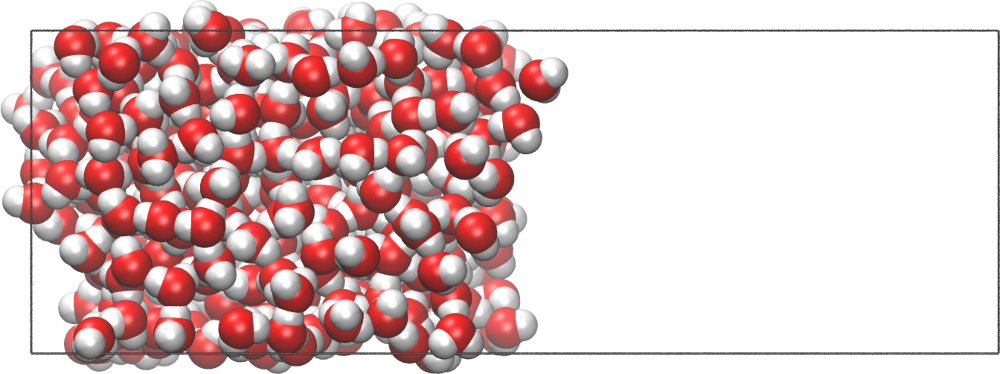

Create a universe using MDAnalysis and define a group containing
the oxygen and the hydrogen atoms of the water molecules:

In [ ]:
u = mda.Universe(datapath+'topol.tpr', 
                 datapath+'traj.trr')
group_H2O = u.select_atoms('name OW HW1 HW2')

Let us print a few information about the trajectory file:

In [ ]:
print(f"The number of water molecules is {np.int32(group_H2O.n_atoms/3)}")
timestep = np.round(u.trajectory.dt,2)
print(f"The time interval between the frames is {timestep} ps")
total_time = np.round(u.trajectory.totaltime,2)
print(f"The total simulation time is {total_time} ps")

Let us use the ``Diporder`` class of MAICoS using
the `group_H2O` group:

In [ ]:
mydiporder = maicos.Diporder(group_H2O, comgroup=group_H2O)
mydiporder.run()

The ``comgroup=group_H2O`` option ensures that the binning is made relative to the center of mass of the water. Then, let us extract the density and $\cos(\theta)$ profile:

In [ ]:
zcoor = mydiporder.results['z']
rho = mydiporder.results['rho']
cos_theta = mydiporder.results['cos_theta']

And finally, let us plot these 2 quantities.

In [ ]:
fig = plt.figure(figsize=(13,6.5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel("z coordinate (nm)", fontdict=font)
plt.ylabel(r"density (1/nm³)", fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax1.plot(zcoor, rho, color=my_color_1, linewidth=4)
ax1.yaxis.offsetText.set_fontsize(20)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.yaxis.offsetText.set_fontsize(30)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)
ax1.tick_params(axis='x', pad=10)
plt.show()

In [ ]:
fig = plt.figure(figsize=(13,6.5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel("z coordinate (nm)", fontdict=font)
plt.ylabel(r"$\cos (\theta)$", fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax1.plot(zcoor, cos_theta, color=my_color_1, linewidth=4)
ax1.yaxis.offsetText.set_fontsize(20)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
ax1.yaxis.offsetText.set_fontsize(30)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)
ax1.tick_params(axis='x', pad=10)
plt.show()

As with other MAICoS modules, there are several options that be tuned. You can access these option by typing:

In [ ]:
help(maicos.Diporder)